In [1]:
#Importing packages
import pandas as pd 
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt

In [2]:
# the list 'indicator' contains the indicator id's
# the list 'country_code' contains the code of a few countries
# 'country_name' is a dictionary that contains the country code along with its corresponding country name
indicator = ["EG.USE.ELEC.KH.PC","EG.ELC.ACCS.ZS","AG.LND.ARBL.ZS","AG.LND.FRST.ZS"]
country_code = ['AUS','CHN','CAN','FIN','IND','MDV','RUS','NZL','DEU','USA','ARG']
country_name = {'AUS':'Australia','CHN':'China','CAN':'Canada','FIN':'Finland','IND':'India',
                'MDV':'Maldives','RUS':'Russia','NZL':'New Zealand','DEU':'Germany','USA':'United States',
                'ARG':'Argentina'}

In [3]:
# shows the information of the indicators
wb.series.info(indicator)

id,value
EG.ELC.ACCS.ZS,Access to electricity (% of population)
AG.LND.ARBL.ZS,Arable land (% of land area)
EG.USE.ELEC.KH.PC,Electric power consumption (kWh per capita)
AG.LND.FRST.ZS,Forest area (% of land area)
,4 elements


In [4]:
# function to read dataframe in world format and return 2 dataframe 
def read(indicator_id,country_code):
    df = pd.DataFrame(wb.data.DataFrame(indicator, country_code, mrv=10))
    df_trnspse = df.transpose()
    return df, df_trnspse

In [5]:
# creating the dataframe dfr and its transposed dataframe using the function
dfr, dfr_tran = read(indicator,country_code)
dfr = dfr.reset_index()
dfr_tran = dfr_tran.reset_index()

In [6]:
# dfr dataframe
dfr.head()

,economy,series,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,ARG,AG.LND.ARBL.ZS,14.170768,14.526307,14.506210,14.323873,14.323873,14.323873,14.323873,14.323873,NaN,NaN
1,ARG,AG.LND.FRST.ZS,10.958713,10.877081,10.795450,10.713819,10.632187,10.600397,10.559837,10.520373,10.480179,10.440715
2,ARG,EG.ELC.ACCS.ZS,99.095352,99.229980,99.342674,100.000000,99.625389,99.849579,100.000000,99.989578,100.000000,100.000000
3,ARG,EG.USE.ELEC.KH.PC,2929.075029,3000.603523,2967.376558,3074.702071,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,AG.LND.ARBL.ZS,4.125705,4.118220,4.063991,4.160251,4.047056,3.907556,3.997910,4.026771,NaN,NaN


In [7]:
# dfr_tran dataframe
dfr_tran.head()

economy   index            ARG                                \
series          AG.LND.ARBL.ZS AG.LND.FRST.ZS EG.ELC.ACCS.ZS   
0        YR2011      14.170768      10.958713      99.095352   
1        YR2012      14.526307      10.877081      99.229980   
2        YR2013      14.506210      10.795450      99.342674   
3        YR2014      14.323873      10.713819     100.000000   
4        YR2015      14.323873      10.632187      99.625389   

economy                              AUS                                \
series  EG.USE.ELEC.KH.PC AG.LND.ARBL.ZS AG.LND.FRST.ZS EG.ELC.ACCS.ZS   
0             2929.075029       4.125705      16.955310          100.0   
1             3000.603523       4.118220      17.047689          100.0   
2             2967.376558       4.063991      17.140067          100.0   
3             3074.702071       4.160251      17.232446          100.0   
4                     NaN       4.047056      17.324825          100.0   

economy                              CAN  ...            NZL  \
series  EG.USE.ELEC.KH.PC AG.LND.ARBL.ZS  ... EG.ELC.ACCS.ZS   
0            10627.293865       4.158678  ...          100.0   
1            10407.740307       4.186451  ...          100.0   
2            10220.887301       4.214223  ...          100.0   
3            10071.398979       4.241996  ...          100.0   
4                     NaN       4.269881  ...          100.0   

economy                              RUS                                \
series  EG.USE.ELEC.KH.PC AG.LND.ARBL.ZS AG.LND.FRST.ZS EG.ELC.ACCS.ZS   
0             9458.485401       7.428098      49.771084          100.0   
1             9360.949162       7.428098      49.768579          100.0   
2             9089.619774       7.428098      49.766073          100.0   
3             9012.731097       7.428098      49.763568          100.0   
4                     NaN       7.428098      49.761063           95.5   

economy                              USA                                \
series  EG.USE.ELEC.KH.PC AG.LND.ARBL.ZS AG.LND.FRST.ZS EG.ELC.ACCS.ZS   
0             6485.759030      17.093563      33.779470          100.0   
1             6617.134161      16.945488      33.809533          100.0   
2             6539.207375      17.005166      33.839596          100.0   
3             6602.657479      17.064845      33.869659          100.0   
4                     NaN      17.124512      33.899723          100.0   

economy                    
series  EG.USE.ELEC.KH.PC  
0            13245.881928  
1            12964.187939  
2            13004.023569  
3            12993.965579  
4                     NaN  

[5 rows x 45 columns]

In [8]:
# Summary statistics of Access to electricity (% of population)
d_acc = dfr[(dfr['series']=='EG.ELC.ACCS.ZS')]
d_acc
d_acc.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,96.892848,98.043508,98.255692,98.533863,98.439260,99.006125,99.265905,99.608143,99.755297,99.909091
std,9.720727,6.023902,5.396888,4.862625,3.710546,3.246735,2.369148,1.296189,0.811588,0.301511
min,67.599998,79.900002,81.999329,83.872498,88.000000,89.217796,92.124947,95.699997,97.308266,99.000000
25%,99.562988,99.674301,99.735306,100.000000,99.665932,100.000000,100.000000,100.000000,100.000000,100.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
# Summary statistics of Access to electricity (% of population) of Australia
s1 = dfr[(dfr['series']=='EG.ELC.ACCS.ZS') & (dfr['economy']=='AUS')]
s1.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
25%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
50%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
75%,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
max,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [10]:
# Summary statistics of Access to electricity (% of population) of India
s2 = dfr[(dfr['series']=='EG.ELC.ACCS.ZS') & (dfr['economy']=='IND')]
s2.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0
mean,67.599998,79.900002,81.999329,83.872498,88.0,89.217796,92.124947,95.699997,97.308266,99.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,67.599998,79.900002,81.999329,83.872498,88.0,89.217796,92.124947,95.699997,97.308266,99.0
25%,67.599998,79.900002,81.999329,83.872498,88.0,89.217796,92.124947,95.699997,97.308266,99.0
50%,67.599998,79.900002,81.999329,83.872498,88.0,89.217796,92.124947,95.699997,97.308266,99.0
75%,67.599998,79.900002,81.999329,83.872498,88.0,89.217796,92.124947,95.699997,97.308266,99.0
max,67.599998,79.900002,81.999329,83.872498,88.0,89.217796,92.124947,95.699997,97.308266,99.0


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/278462726.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(d_acc.mean(), color = 'orange')


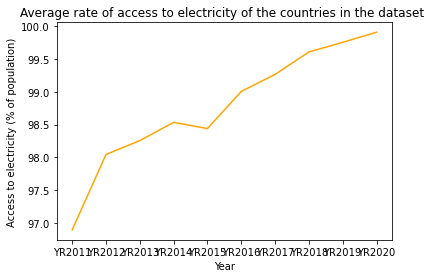

In [11]:
# plotting figure
fig, ax = plt.subplots()
ax.plot(d_acc.mean(), color = 'orange')
ax.set_xlabel("Year")
ax.set_ylabel("Access to electricity (% of population)")
ax.set_title("Average rate of access to electricity of the countries in the dataset ")
plt.show()

/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/1286354926.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s1.mean(),color = 'b', linestyle = '--')
/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/1286354926.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s2.mean(),color = 'r', linestyle = '--')


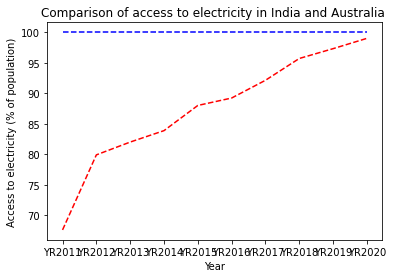

In [12]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(s1.mean(),color = 'b', linestyle = '--')
ax.plot(s2.mean(),color = 'r', linestyle = '--')
ax.set_xlabel("Year")
ax.set_ylabel("Access to electricity (% of population)")
ax.set_title("Comparison of access to electricity in India and Australia ")
plt.show()

On an average, the access to the electricity  among the the countries in the dataset has been increasing from 96.89 % to 99.90% during a time period from 2011 to 2020.
The rate remained constant at a 100% rate throughout the same time period in Australia, but in India the rate has been increasing from 67.59% to 99% for the same time period.

In [13]:
# Summary statistics of Electric power consumption (kWh per capita)
d_power = dfr[(dfr['series']=='EG.USE.ELEC.KH.PC')]
d_power
d_power.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,10.000000,10.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,8537.590901,8483.587224,8482.167703,8433.924865,NaN,NaN,NaN,NaN,NaN,NaN
std,5328.609625,5205.247688,5204.212777,5101.235290,NaN,NaN,NaN,NaN,NaN,NaN
min,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN
25%,4093.278409,4253.798195,4452.690660,4579.652568,NaN,NaN,NaN,NaN,NaN,NaN
50%,8369.878788,8315.550842,8153.574432,8024.107036,NaN,NaN,NaN,NaN,NaN,NaN
75%,12591.234912,12325.076031,12308.239502,12263.323929,NaN,NaN,NaN,NaN,NaN,NaN
max,15710.973759,15689.223308,15750.811633,15588.487146,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Summary statistics of Electric power consumption (kWh per capita) of India
s3 = dfr[(dfr['series']=='EG.USE.ELEC.KH.PC') & (dfr['economy']=='IND')]
s3.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN
25%,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN
50%,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN
75%,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN
max,696.842681,723.236917,764.201134,804.516349,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Summary statistics of Electric power consumption (kWh per capita) of Australia
s4 = dfr[(dfr['series']=='EG.USE.ELEC.KH.PC') & (dfr['economy']=='AUS')]
s4.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,10627.293865,10407.740307,10220.887301,10071.398979,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10627.293865,10407.740307,10220.887301,10071.398979,NaN,NaN,NaN,NaN,NaN,NaN
25%,10627.293865,10407.740307,10220.887301,10071.398979,NaN,NaN,NaN,NaN,NaN,NaN
50%,10627.293865,10407.740307,10220.887301,10071.398979,NaN,NaN,NaN,NaN,NaN,NaN
75%,10627.293865,10407.740307,10220.887301,10071.398979,NaN,NaN,NaN,NaN,NaN,NaN
max,10627.293865,10407.740307,10220.887301,10071.398979,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/1010216430.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(d_acc.mean(), color = 'orange')


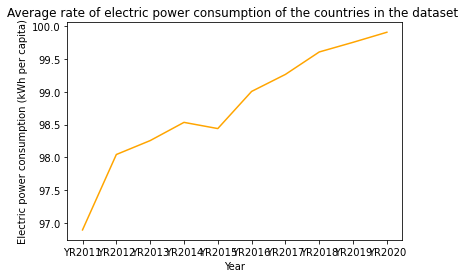

In [16]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(d_acc.mean(), color = 'orange')
ax.set_xlabel("Year")
ax.set_ylabel("Electric power consumption (kWh per capita)")
ax.set_title("Average rate of electric power consumption of the countries in the dataset ")
plt.show()

/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/3654380517.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s3.mean(),color = 'b', linestyle = '--')
/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/3654380517.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s4.mean(),color = 'r', linestyle = '--')


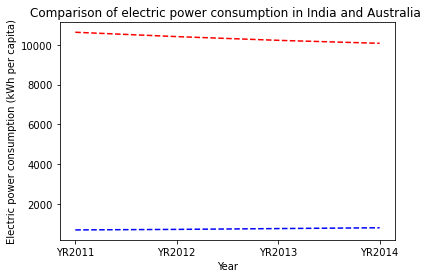

In [17]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(s3.mean(),color = 'b', linestyle = '--')
ax.plot(s4.mean(),color = 'r', linestyle = '--')
ax.set_xlabel("Year")
ax.set_ylabel("Electric power consumption (kWh per capita)")
ax.set_title("Comparison of electric power consumption in India and Australia ")
plt.show()

The average consumption of the electric power among countries in the dataset is seen decreasing from 8537.59 kWh to 8433.92 kWh during a time period from 2011 to 2014.
The average electric power consumption increased from 696.84kWh to 804.51kWh in India and in Germany, the consumption has decreased from 10627.29kWh to 10071.39kWh fro 2011 to 2014.

In [18]:
# Summary statistics of Forest area (% of land area)
d_forest = dfr[(dfr['series']=='AG.LND.FRST.ZS')]
d_forest.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,31.029654,31.070125,31.107523,31.147652,31.187851,31.219593,31.240758,31.264325,31.290152,31.321811
std,19.489395,19.501615,19.513855,19.526655,19.538745,19.521869,19.514688,19.507436,19.501105,19.496941
min,2.733333,2.733333,2.733333,2.733333,2.733333,2.733333,2.733333,2.733333,2.733333,2.733333
25%,19.223203,19.372142,19.521081,19.670020,19.818959,19.984183,20.082612,20.181525,20.281240,20.380955
50%,32.737549,32.745166,32.718986,32.722843,32.732328,32.685482,32.684546,32.683611,32.683611,32.683611
75%,38.067478,38.064601,38.061724,38.058847,38.055971,38.054024,38.059747,38.065850,38.083479,38.132819
max,73.300865,73.410774,73.520682,73.630590,73.735645,73.735645,73.733219,73.733219,73.733219,73.733219


In [19]:
# Summary statistics of Forest area (% of land area) of Russia
s5 = dfr[(dfr['series']=='AG.LND.FRST.ZS') & (dfr['economy']=='RUS')]
s5.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
mean,49.771084,49.768579,49.766073,49.763568,49.761063,49.7727,49.784336,49.784336,49.784336,49.784336
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,49.771084,49.768579,49.766073,49.763568,49.761063,49.7727,49.784336,49.784336,49.784336,49.784336
25%,49.771084,49.768579,49.766073,49.763568,49.761063,49.7727,49.784336,49.784336,49.784336,49.784336
50%,49.771084,49.768579,49.766073,49.763568,49.761063,49.7727,49.784336,49.784336,49.784336,49.784336
75%,49.771084,49.768579,49.766073,49.763568,49.761063,49.7727,49.784336,49.784336,49.784336,49.784336
max,49.771084,49.768579,49.766073,49.763568,49.761063,49.7727,49.784336,49.784336,49.784336,49.784336


In [20]:
# Summary statistics of Forest area (% of land area) of New Zealand
s6 = dfr[(dfr['series']=='AG.LND.FRST.ZS') & (dfr['economy']=='NZL')]
s6.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
mean,37.400091,37.398944,37.397797,37.39665,37.395503,37.396035,37.411606,37.427937,37.46732,37.570126
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,37.400091,37.398944,37.397797,37.39665,37.395503,37.396035,37.411606,37.427937,37.46732,37.570126
25%,37.400091,37.398944,37.397797,37.39665,37.395503,37.396035,37.411606,37.427937,37.46732,37.570126
50%,37.400091,37.398944,37.397797,37.39665,37.395503,37.396035,37.411606,37.427937,37.46732,37.570126
75%,37.400091,37.398944,37.397797,37.39665,37.395503,37.396035,37.411606,37.427937,37.46732,37.570126
max,37.400091,37.398944,37.397797,37.39665,37.395503,37.396035,37.411606,37.427937,37.46732,37.570126


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/956799535.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(d_forest.mean(), color = 'orange')


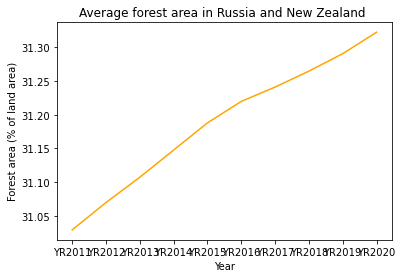

In [21]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(d_forest.mean(), color = 'orange')
ax.set_xlabel("Year")
ax.set_ylabel("Forest area (% of land area)")
ax.set_title("Average forest area in Russia and New Zealand ")
plt.show()

/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/319445903.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s5.mean(),color = 'b', linestyle = '--')
/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/319445903.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s6.mean(),color = 'r', linestyle = '--')


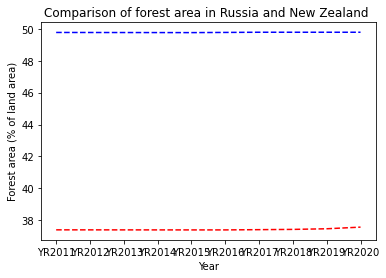

In [22]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(s5.mean(),color = 'b', linestyle = '--')
ax.plot(s6.mean(),color = 'r', linestyle = '--')
ax.set_xlabel("Year")
ax.set_ylabel("Forest area (% of land area)")
ax.set_title("Comparison of forest area in Russia and New Zealand ")
plt.show()

The average forest area among the countries in the dataset has increased from 31.02% to 31.32%. In Russia, the forest area has been varying between 49.76% and 49.77% from 2011 to 2016 but it remained constant at 49.78% from 2017 to 2020 wheras in New Zealand, the forest area decreased from 37.40% to 37.39% from 2011 to 2016 and an increase in the area from 37.41% to 37.57% during the time period from 2017 to 2020. 

In [23]:
# Summary statistics of Arable area (% of land area)
d_arable = dfr[(dfr['series']=='AG.LND.ARBL.ZS')]
d_arable.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.0,0.0
mean,15.348959,15.352044,15.361724,15.376313,15.331039,15.322102,15.319350,15.313598,NaN,NaN
std,15.265049,15.198380,15.195249,15.171726,15.202738,15.155078,15.170043,15.151813,NaN,NaN
min,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN
25%,5.782159,5.793742,5.766495,5.791405,5.824026,5.843944,5.836071,5.849288,NaN,NaN
50%,12.800417,12.728202,12.707193,12.695893,12.689357,12.680817,12.678503,12.678246,NaN,NaN
75%,15.632166,15.735898,15.755688,15.694359,15.724192,15.754031,15.783865,15.783865,NaN,NaN
max,52.798173,52.652538,52.617559,52.624622,52.608814,52.608814,52.608814,52.608814,NaN,NaN


In [24]:
# Summary statistics of Arable area (% of land area) of Russia
s7 = dfr[(dfr['series']=='AG.LND.ARBL.ZS') & (dfr['economy']=='RUS')]
s7.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
mean,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,NaN,NaN
25%,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,NaN,NaN
50%,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,NaN,NaN
75%,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,NaN,NaN
max,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,7.428098,NaN,NaN


In [25]:
# Summary statistics of Arable area (% of land area) of New Zealand
s8 = dfr[(dfr['series']=='AG.LND.ARBL.ZS') & (dfr['economy']=='NZL')]
s8.describe()

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
mean,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN
25%,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN
50%,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN
75%,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN
max,1.788766,1.933083,2.077399,2.240705,1.815351,2.054612,1.864722,1.864722,NaN,NaN


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/1821472242.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(d_arable.mean(), color = 'orange')


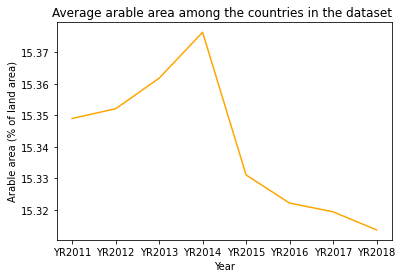

In [26]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(d_arable.mean(), color = 'orange')
ax.set_xlabel("Year")
ax.set_ylabel("Arable area (% of land area)")
ax.set_title("Average arable area among the countries in the dataset ")
plt.show()

/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/1954196441.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s7.mean(),color = 'b', linestyle = '--')
/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_20746/1954196441.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax.plot(s8.mean(),color = 'r', linestyle = '--')


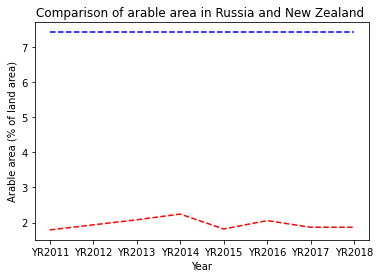

In [27]:
#plotting figure
fig, ax = plt.subplots()
ax.plot(s7.mean(),color = 'b', linestyle = '--')
ax.plot(s8.mean(),color = 'r', linestyle = '--')
ax.set_xlabel("Year")
ax.set_ylabel("Arable area (% of land area)")
ax.set_title("Comparison of arable area in Russia and New Zealand ")
plt.show()

If we check the average area of arable lands of the countries in the dataset as a whole, we can see that the percentage of area has increased from 15.34% to 15.37% in 2011 to 2014 but then we can see that there is a drastic decrease in the area after 2014 from 15.33% to 15.31% in 2015 to 2018.
In Russia, the area has remained the same i.e. 7.42% of the land were arable lands throughtout the year from 2011 to 2018, but in the case of New Zealand the area has been varying between 1.78% and 2.24% during the time period from 2011 to 2018.